# Course Theme: Understanding Fastscape Fundementals and Applying Fastscape to Data

# Notebook 1: Model Theory in the Orogenic Zone

## Objectives of this Notebook: 
1) What to use as inputs to the Basic Equation;
2) Discuss the incorporation of the equation into Fastscape;
3) Run the model in groups;
4) Discuss Orogenic Steady State;
5) Calculate Orogenic Steady State;

## 1) Introduction: All models rely on assumptions and are a simplification of the real world...so what are our goals?

As data geoscietists: Our first goal is to understand what a model can and can't do in order to answer targeted questions (or narrow down possibilities) around a problem in the real world. After understanding the model, start a list of what is known about your area in question, rank what is most important to that area, discuss with colleuges, and try to brainstorm how this can be turned into a model parameter. Start simple with the modelling and add complexities (if you like) as you go. (IE: Your car needs an engine before you can customize the tail pipe). 

As time and space travellers: Try to first (before playing with other parameters) to constrain where and when you are modelling. This includes understanding steady-state and landscape response (we will cover this). This also intails understanding what is most relevant for different spatial and temporal scales and using a set up that is best suited for this. (IE; At some point as Mount Everst first started forming, it probably breifly looked like a small hill. If we enter random inputs, run the model and output a small hill, we want to be aware if this is in fact a small hill and will remain so for another 5Myrs or if this is a small hill that is evolving into Mt.Everest). 

As modellers: The modelling world is expanding rapidly. It is the new frontier ever building on equations and knowledge laid down before. Thus, for those who are curious, there is a long latter to climb to discove the origin or future possiblities and additions of a given set up. (IE: if the ideal model you want doesn't exisit take a look in another year or two or consider one day making an addition to the repository that already exists). 

As humans: don't loose yourself in the code. Implement good coding practices from the beginning...

<img src="./images/simplification.png" width="500">

#Ask about who has used SPL?

## 2) Orogenic Area: recall the Basic Equation

Basic Fastscape Equation:  $\frac{\partial h}{\partial t} = U - K_f A^mS^n $

- The landscape evolution (change in topography over time)is: $\frac{\partial h}{\partial t}$
- Uplift is: U
- The erosion rate or stream power law (incision) is: $ K_f A^mS^n $ 


## What values to use and why for the stream power law K, m,& n 

Let's peek under the hood... 
<img src="./images/peekunderHood.jpeg" width="500">

Stream Power Law Again (sorry, but this matters later): What the heck is K, m, and n and where do they come from?
- Unit stream power was originally (Bagnold, 1966) applied on modern scales to calculate the energy exerted by the river on its bed (to incise) using discharge (Q), width (b), water density, and gravity acceleration (see https://doi.org/10.1016/j.geomorph.2010.10.027). $\omega ={\frac  {\rho gQS}{b}}$
- On the Geological time scale it is difficult to estimate channel width and discharge. Instead we assume that discharge over channel width is proportional to drainage area. This is where area comes from in the landscape evolution equation. 
- To make discharge/wdith that is proportion to area equal to drainage area, we need the constant K and the exponent m. How this is derived in further detail is described in: https://youtu.be/erlhgz3kc80 if you would like further details. 
- In the real world, stream power does not always perfectly equal erosion rate. A K and n are necessary to translate incision (stream power) to actual material eroded (erosion rate), which is impacted by erodibility of the bed. n represents the scalling between stream power and erosion rate (see below). 
- Translating stream power to erosion and discharge to drainage area all get multiplied into one K coefficient at the end. 

m & n:
- m/n is equal to channel concavity and a concavity of ~0.5 (0.4-0.6) captures the most common river profiles on earth (see https://doi.org/10.1029/1999JB900120 and https://doi.org/10.5194/esurf-6-505-2018).
- concavity also helps us to constrain what m and n should be.



<img src="./images/concavity.png" width="500">
(Whipple and Tucker, 1999)

*Remember to maintain m/n between ~0.4-0.6

n:
- n represents the linear (n=1) or not (n!=1) relationship between stream power and erosion rate. Increasing n>1 means that more erosion will occur for a given stream power and n<1 means that less erosion will occur per stream power. 
- I would recommend keeping n=1 (linear). This then assumes that everywhere there is stream power, there is linearly proportional erosion and is the simplest for numerical modelling solutions!
- There is much debate around the realities of n within the real world (see https://doi.org/10.1016/j.geomorph.2008.01.018 that argues for n>1 (even closer to 1.7 or 2)), but you can also add hillslope diffusion (more on this later) to the model if you want to replicate a non-linear erosion without complicating numeric computation. 

m:
- m=0.5 if we assume a linear relationship between drainage area (in m^2) and precipitation (the precipitation rate is applied evenly over the entire drainage basin evenly). 
- m=0.5 produces the simplest units for K (so sedimentologists like it), but mathematically you run into a divide by 0 problem when computing mathematical proofs (for steady-state and more). Thus, modellers and those geoscientists mathematically inclined tend towards an m=0.45 or 0.4. There is no real rule for this. 
- Be careful when comparing K when changing m between simulations. This actually changes the units of K (see below). 
- You can also vary precipitation using a precipitation paramter while leaving m as near linear (recommended and explained more later).

K:
- K and m are inter-related with the drainage area and changing m will impact your K. Thus, K units are in meters per year when m=0.5. When m is not 0.5 (non-linear precipitation), the exponent on the meters depends on the stream power area exponent m: $$(meter^{1-2m}year^{-1})$$
- In Fastscape we specify K_f if because we are looking specifically in the channel and erosion can also occur outside of the channel (hillslopes) through an entirely different diffusion function.
- K_f can be split/summarized into components of K_f_r, K_f_c, K_f_τ in some breakdowns of deriving the stream power law (eg: https://doi.org/10.1146/annurev.earth.32.101802.120356). According to Whipple (2004)in the channel: "K_f_r represents erosional resistance (lithology, hydraulic roughness, channel width), K_f_c represents climatic conditions, and K_f_τ is a threshold term set by the fraction of storm events that exceed the critical shear stress for incision". Sediment influence on incision we will deal with later (in the basin/sediment model). 
- K_f splitting witin Fastscape (that we will use): K_f can be slipt into fluvial erodibility (based on the bedrock lithology being incised) in the channel and precipitation/climate: $$K_f=K_{f_e}*v^m$$
- Eric Deal's past PhD work with Jean Braun has begun to address a storm threshold impact on K similar to the K_f_τ, but we will not use this during the workshop. Just be aware that it exist and may be important for you if you are dealing with an area dominanted on long time scales with intermittent rivers that become activated during flooding. 
- K_f ranges roughly between (1e-4 to 1e-6), but this range shifts depending on m (e-5 range is ideal). 
- Generally, the higher the K_f, the more erodible (and less high) your mountain will be. 


<img src="./images/itsok.png" width="500">

## 3) Incorporation of the Stream Power Law into Fastscape

### Implementation for within the channel

1) impose condition (uplift and subsidence rate)

2) calculate drainage on current topography by connecting nodes to nearest lowest elevation 

3) Calculate stream power through the drainage stack

4) update the topography after applying the erosion rate

5) repeat until time steps are completed

The FastScape algorithm, developed by [Braun and Willett, 2013](https://www.sciencedirect.com/science/article/pii/S0169555X12004618), is unconditionally stable, highly efficient and relatively accurate, although it suffers from problems, i.e., it is not weel suited to study the propagation of knockpoints, which it tends to smooth out (see [Campforts et al, 2015](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1002/2014JF003376)).

It is based on an ordering of the nodes that is obtained after defining the receiver node to each node, from which the donor nodes to each node are computer.

The model can run in single or multi-flow.

![Donor-Receiver](./images/DonorReceiver.jpg "Donor-Receiver")

#### So much is possible with Fastscape: https://fastscape.readthedocs.io/en/latest/


 ### 3.5) From direct model outputs (eg: erosion rate and topography) in the stream power law, we can caclulate further values through post-processing

1) A (drainage area) and precipitation form discharge (flow accumulation)

2) erosion/deposition rate integrated over the flow path forms the sediment flux

3) Grain size also relies on the stack integration (more on this later)

## 4) Orogenic Steady State

### 4.1) Orogenic Steady-State Description

If left for long enough, what will the landscape evolve to with the given boundary conditions?
- Eventually, with constant inputs, a relatively stable topopgraphy will be produced (always some fluctuations between time steps, but these become obsolete when averaging over a long enough interval).

- Orogenic Steady-State has been mathematically defined as the point when the spatial mean of topography ($H_s$) reaches ~63% of the maximum over time of the mean (over space) topography of the mountain ($H_{max}$). The equation for deriving the mean mountain height comes out of the stream power law and looks like: $H_s= H_{max} * (1-exp(-t/tau))$. At steady-state our time interval (t) is equal to our response time (tau) and thus $(1-exp(-t/tau))$ becomes ~0.632.

- Be careful, because the above cestimation of steady-state topography assumes that you ran the model long enough to generate relatively constant topography. Thus, it is good practice to plot the mean topography over time to see if it eventually becomes relatively constant (see 4.2 plot 2). If it does not become constant, you may need to increase your simultion time to reach steady-state.

- At/approaching orogenic Steady-State there is a relatively constant topographic height (dh/dt=0), erosion rate, and outgoing flux is reached in the mountain catchment.

- IE: $ U ≈ K_f A^mS^n$ uplift approximates erosion rate and $U*A_o≈qs_0$ the produce of uplift and area approximate steady-state mountain flux. 

- Thus, stream power variabels (K,m,n, and S) can impact the final topography produced and the time it takes to get there, but the steady-state erosion rate and flux are controlled by the uplift and area.



Why do we care about steady-state?:

1)Comparability: There is value in analyzing the building (transient) phase of the model (not all landscapes are at steady state), but when contrasting different input scenarios,regions, and geometries it is wise to compare the steady-state solution. Otherwise it is difficult to know if you are just comparing landscapes at a different transition phases (unless this is your goal) and to isolate the total impact of a given event. Many different landscapes look similar at one brief point in time, but they reach different ends (eg: Himalayas were hills at one point) 

2)Simplifications: Certain assumptions and simplifications can also be made at steady-state and thus, there are many geometries that have come out of the stream power law describing the steady-state solution (eg: hack's law, concavity (m/n), steepness (U/K),and many more). 

3) Scale matters: it is important to know when we are in time and how this changes in response to different inputs. My first tries at modelling, I did not run the models for long enough and then was very confused at the results. 

### 4.2) Steady-State Example

In [2]:
import numpy as np
import xsimlab as xs
import xarray as xr
import zarr
import matplotlib.pyplot as plt
from fastscape.models import basic_model

%config InlineBackend.figure_format = 'svg'

#### 1) Calculate Steady-state Paremters

In [3]:
zdataset = xr.open_zarr('practice_BasicModeldiff5e-3.zarr').set_index()
timestepbtw_output=1000 #yrs
SteadystateHeightTHreshold=(1-np.exp(-1))

MountainMeanHeight=zdataset.topography__elevation.mean('y').mean('x')
SteadyMountainStartHeight= (MountainMeanHeight.max('out').values*SteadystateHeightTHreshold) #Steady state is defined as when the topographic height reaches 63% of the mean topographic maximum over time. 

SteadyMountainStart=np.where(MountainMeanHeight>=SteadyMountainStartHeight)[0][0]

print('Orogenic Steady-State Reached after',zdataset.out[SteadyMountainStart].values/1e6, "Myrs")
print('Mean Steady-State Height at',round(float(zdataset.topography__elevation.mean('y').mean('x')[SteadyMountainStart].values),2), "m")

Orogenic Steady-State Reached after 2.0 Myrs
Mean Steady-State Height at 1453.76 m


#### Plot 1) Take a look at what the topography looks like

In [4]:
from ipyfastscape import TopoViz3d

app = TopoViz3d(zdataset, canvas_height=600, time_dim="out")

app.components['background_color'].set_color('lightgray')
app.components['vertical_exaggeration'].set_factor(5)
app.components['timestepper'].go_to_time(zdataset.out[-1])

app.show()

/Users/awild/opt/anaconda3/envs/fastscape2023workshop/lib/python3.10/site-packages/ipyfastscape/xr_accessor.py:73: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  return self._dataset.indexes[self.time_dim].get_loc(time, method='nearest')


Output(layout=Layout(height='640px'))

#### Plot 2) the mean (mean x and y) topography over time 

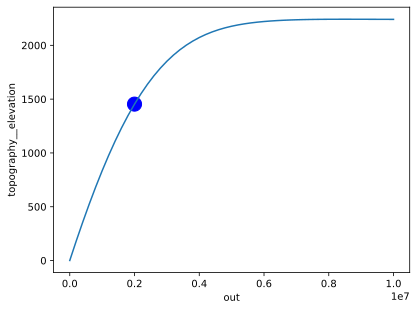

In [5]:
zdataset.topography__elevation.mean('y').mean('x').plot()
plt.scatter(zdataset.out[SteadyMountainStart],zdataset.topography__elevation.mean('y').mean('x')[SteadyMountainStart],color='b',s=200)

#### Plot 3)  the uplift rate minus the average (x and y) erosion rate over time

Mean Steady-State Erosion Rate 0.0008182689409085932 m/yr


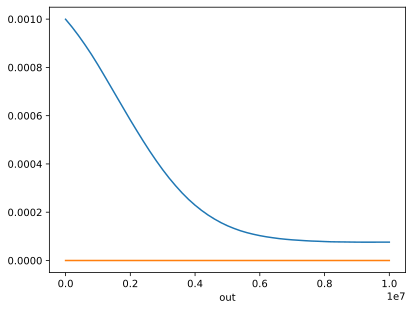

In [6]:
nout=51 #the number of time steps stored
(zdataset.uplift__rate-zdataset.erosion__rate.mean('y').mean('x')).plot()
plt.plot(zdataset.out,np.linspace(0, 0, nout))
#plt.gca().set_ylim(0,0.00002)
print("Mean Steady-State Erosion Rate", zdataset.erosion__rate.mean('y').mean('x').isel(out=slice(SteadyMountainStart,-1)).mean('out').values, "m/yr")

### 4.3) Practice: Basic Model

### 1) Import key libraries

In [532]:
# %load_ext xsimlab.ipython
# import numpy as np
# import xsimlab as xs
# import xarray as xr
# import zarr
# from ipyfastscape import TopoViz3d
# import matplotlib.pyplot as plt
# from fastscape.models import basic_model
# model= basic_model

### 2) Choose Inputs

In [536]:
- Enter the following inputs to the basic_model using batch or select a single variable from those listed below:
- Please coordinate in groups of 3-4 to make sure that not everyone plots the same variable

In [ ]:
# CHOOSE:
# 1)'grid__shape': [51,51] AND 'grid__length': [50e3, 50e3]
# OR (PICK ONE)
# 2)'grid__shape': [101,101] AND grid__length': [100e3, 100e3]

# 'spl__k_coef'= xr.DataArray([[5e-6, 5e-5, 5e-4] ,dims=['K_f'])

# 'uplift__rate' = xr.DataArray([1e-3, 5e-4],dims=['U'])

# 'diffusion__diffusivity' = 0

# 'spl__slope_exp'=1

# 'spl__area_exp' =0.5,0.4 (select one) #m

# Use:
# 'time': np.linspace(0,10e6,10001),
# 'out': np.linspace(0,10e6,51)  


In [555]:
# %create_setup model --default --verbose

### 3) Choose Outputs

In [530]:
# output the erosion__rate, topography__elevation, and uplift__rate

### 4) Run the model (with or without batch as you like) and store outputs as a .zarr

### 5) Plot it

- Plot the topography from the final time step output (no example given)
- Plot the mean (mean x and y) topography over time (try to do this yourself or refer to 1 and 2 in the steady-state example)
- Plot the uplift rate minus the average (x and y) erosion rate over time (refer to 1 and 3 in the steady-state example)

### 4.4) Equation for Deriving Orogenic Steady-State Response Time

Yet, how does one calculate when steady-state will be reached in the mountain and check this with a given set of inputs? How long should your simulations be?

See [Braun et al, 2015](https://esurf.copernicus.org/articles/3/1/2015/esurf-3-1-2015.pdf) where the response time of an orogen is defined as:

$\tau=\frac{L^{1-mp/n}}{K_f^{1/n}U^{1-1/n}C^{m/n}}$

If we seperate K_F into the erodibilty and precipitation, the solution becomes:

$\tau=\frac{L^{1-mp/n}}{K_{f_e}^{1/n}U^{1-1/n}C^{m/n}v^{m/n}}$




### 4.5) Hungry for more? Otherwise ignore...

Where did the new constant C and exponent p come from?

Stop: Check... do you still have energy?
1) Yes -proceed to to 1

2) No, my brain hurts -proceed to 2 (close your eyes as you pass 1!)

3) For reference later (this part will make sense at the end of the course and are important to note, but ignore it for now).



-----------------------------------------------------------------------------------------------------------------

1) The orogenic steady-state calculation uses patameters from the Stream Power Law and Hack's law. $L=f(A)^j $ 
- Hack's law relates channel lengths with drainage area where L is main stream length, A is the catchment area, and f is a constant. It was derived long before numerical modelling took off. Constants and Exponents (described in https://doi.org/10.1038/s41467-018-06210-4): f ranges between 1 and 6 (some sources say 1.1 and 2.7) and j is commonly 0.5-0.6, but can range between 0.45- 0.7 in areas measured on earth. 
- Fastscape does not imposed Hack's Law, yet it matches it very well. Therefore, you could also calculate them from model outputs. 
- Within the model, we know the length of the growing channel more easily than it's contribution area (although this can also be derived). Thus, Hack's law becomes rearranged for area as ${\frac{L}{f}}^{\frac{1}{j}}=A; cL^p=A$. Once rearranged, new constants and exponents emerge for the common j=0.5 and f=1.4 become p=2 and C=0.6. Now you know where these came from, and we will only use the most common values for the time being. Further resources on Hack's law and stream power at steady-state can be found at: https://geomorphonline.github.io/fluvial/concavity_steepness/ or  https://doi.org/10.1029/2000WR900229 


2) p=2 and C=0.6 for our purposes during the workshop and many river systems in the real world.

3) If a deposition (G) terms (to be discussed later) was added to the mountain area and into the 4.4 equations, G  would be added to the bottom denominator of the tau equations and v would be updated because G also impacts precipitation (see modification to v below /update v with the new term when using G). The G term becomes 0 when n=1 (ignore it for now): $ Gq_s^{1-1/n}; v^{1+\frac{m-1}{n}} $ .  Also, In small catchments with short response times hillslope diffusion can also play a role, but this becomes obsolete under large time response times and catchments.

### 4.6) Calculate Orogenic Steady State 

Use: $$\tau=\frac{L^{1-mp/n}}{K_{f_e}^{1/n}U^{1-1/n}C^{m/n}v^{m/n}}$$
In the simplest soltuion with values for m, n, p, and C of 0.5, 1, 2, and  0.6 respectively.
1) Calculate a test case with the following inputs: a 30000m long river (L), 0.5m/yr precip(v), Uplift of 5e-4 m/yr, and a erodibilty of 2e-5

2) calculate the same equation without the erodibility term?

3) what parameter has the greatest influence on when steady-state is reached?





## Don't scroll past this point unless you want spoilers :(

In [360]:
# last chance to turn around XD

## Results

In [18]:
#modelling

In [2]:
%load_ext xsimlab.ipython
import numpy as np
import xsimlab as xs
import xarray as xr
import zarr
from ipyfastscape import TopoViz3d
import matplotlib.pyplot as plt
from fastscape.models import basic_model
model= basic_model

In [79]:
# CHOOSE:
# 1)'grid__shape': [51,51] AND 'grid__length': [50e3, 50e3]
# OR (PICK ONE)
# 2)'grid__shape': [101,101] AND grid__length': [100e3, 100e3]

# 'spl__k_coef'= xr.DataArray([[5e-6, 5e-5, 5e-4] ,dims=['K_f'])

# 'uplift__rate' = xr.DataArray([1e-3, 5e-4],dims=['U'])

# 'diffusion__diffusivity' = 0

# 'spl__slope_exp'=1

# 'spl__area_exp' =0.5,0.4 (select one) #m

# Use:
# 'time': np.linspace(0,10e6,10001),
# 'out': np.linspace(0,10e6,51)  

In [6]:
# %create_setup model --default --verbose
import xsimlab as xs

ds_in = xs.create_setup(
    model=model,
    clocks={'time': np.linspace(0,10e6,10001),
            'out': np.linspace(0,10e6,51)},
    master_clock = 'time',
    input_vars={
        # nb. of grid nodes in (y, x)
        'grid__shape': [51,51],
        # total grid length in (y, x)
        'grid__length': [50e3, 50e3],
        # node status at borders
        'boundary__status': 'fixed_value',
        # uplift rate
        'uplift__rate': xr.DataArray([1e-3, 5e-4],dims=['U']),
        #'uplift__rate': ('uplift__rate', [1e-3, 1e-4]),
        # bedrock channel incision coefficient
        #'spl__k_coef': ('spl__k_coef', [5e-6, 5e-5, 5e-4]),
        'spl__k_coef': xr.DataArray([5e-6, 5e-5, 5e-4],dims=['K']),
        # drainage area exponent
        'spl__area_exp': 0.4,
        # slope exponent
        'spl__slope_exp': 1,
        # relative tolerance (Gauss-Siedel convergence)
        'spl__tol_rel': 0.0001,
        # absolute tolerance (Gauss-Siedel convergence)
        'spl__tol_abs': 0.0001,
        # max nb. of iterations (Gauss-Siedel convergence)
        'spl__max_iter': 100,
        # diffusivity (transport coefficient)
        'diffusion__diffusivity': 0,
        # random seed
        'init_topography__seed': None,
    },
    output_vars={'topography__elevation': 'out',
                 'erosion__rate': 'out',
                 'uplift__rate': 'out',}
)


In [7]:
#zgroup = zarr.group("practice2_BasicModel_BATCH50m0_4.zarr", overwrite=True)

In [81]:
#zgroup = zarr.group("practice_BasicModel_BATCH50m0_4.zarr", overwrite=True)

In [8]:
with basic_model, xs.monitoring.ProgressBar():
    ds_out = (
        ds_in
        .stack(batch=['U','K'])
        
        
        .drop_indexes(["batch", "U", "K"])    # explicitly drop the multi-index 
        .drop_vars("batch")                   # remove the batch dimension coordinate
        .xsimlab.run(check_dims='transpose',store=zgroup,batch_dim='batch',parallel=True,scheduler='processes',
        )
        .set_index(batch=["U", "K"])          # explicitly set the multi-index
        .unstack("batch")
    )

██████████ 100% | Simulation finished in 00:14 
██████████ 100% | Simulation finished in 00:14 
██████████ 100% | Simulation finished in 00:14 
██████████ 100% | Simulation finished in 00:14 
██████████ 100% | Simulation finished in 00:14 
██████████ 100% | Simulation finished in 00:14 


In [4]:
zdataset = xr.open_zarr('practice_BasicModel_BATCH50m0_4.zarr').set_index(batch=["U", "K"]).unstack("batch")

In [ ]:
zdataset.topography__elevation.mean('x').mean('y').isel(U=1).plot.line(x='out')

In [50]:
#zdataset = xr.open_zarr('practice_BasicModeldiff5e-3.zarr').set_index()
timestepbtw_output=1000 #yrs
SteadystateHeightTHreshold=(1-np.exp(-1))

MountainMeanHeight=zdataset.topography__elevation.mean('y').mean('x')
SteadyMountainStartHeight= xr.DataArray((MountainMeanHeight.max('out').values*SteadystateHeightTHreshold),dims=['U','K']) #Steady state is defined as when the topographic height reaches 63% of the mean topographic maximum over time. 


Orogenic Steady-State Reached after 0.2 Myrs


In [71]:
#INputs
kf=[5e-6, 5e-5, 5e-4]
up=[1e-3, 5e-4]
m=0.4
size=50e3


for u in range(0,len(up)):
    for k in range(0,len(kf)):
        steadystart=np.where((MountainMeanHeight.isel(K=k).isel(U=u))>=(SteadyMountainStartHeight.isel(K=k).isel(U=u)).values)[0][0]
        steadyheight=round(float(zdataset.topography__elevation.mean('y').mean('x').isel(U=u).isel(K=k).isel(out=steadystart).values),2)
        print('Orogenic Steady-State for K =',kf[k],'and U=',up[u],' reached after ',steadystart,"Myrs is",steadyheight,'m' )
    print(' ')
#


Orogenic Steady-State for K = 5e-06 and U= 0.001  reached after  10 Myrs is 1453.11 m
Orogenic Steady-State for K = 5e-05 and U= 0.001  reached after  1 Myrs is 146.46 m
Orogenic Steady-State for K = 0.0005 and U= 0.001  reached after  1 Myrs is 23.02 m
 
Orogenic Steady-State for K = 5e-06 and U= 0.0005  reached after  10 Myrs is 730.4 m
Orogenic Steady-State for K = 5e-05 and U= 0.0005  reached after  1 Myrs is 73.29 m
Orogenic Steady-State for K = 0.0005 and U= 0.0005  reached after  1 Myrs is 11.49 m
 


In [9]:
#equation

- Self-simularity of size is only possible with m=0.5 and n=1 (only a slight influence otherwise)

We see that variables become:


$$L^{0}= 1$$
$$U^0=1$$
$$C^{0.5}=0.7746$$
$$v^{0.5}=0.70711$$
$$K_{f_e}=0.00002$$

$$\frac{1}{0.00002*1*0.7746*0.70711} = ~9.1286e4 $$

The tau solution without K_fe is 1.8 (ignore units) and with K_fe is 91286 years. Thus, K_{f_e} has the greatest impact on the long term steady state of the mountain. 

The smaller K_f, the longer it takes to reach steady-state!!

$$\frac{1}{0.0000002*1*0.7746*0.70711} = 9.1286e6 $$

$$\frac{1}{0.002*1*0.7746*0.70711} = 9.1286e2 $$

Even if the exponents are changed of m=0.4, n=0.8, p=1.666, C=2.2

The solution without K_{f_e} is 0.79 and with K_{f_e} is 593198 showing how the response time is controlled largely by K_{f_e} and the exponent n on K_{f_e} (order of magnitude) and the other variables will only slightly increase or reduce this (within the same magnitude). 

In [2]:
#For when you start working with the sediment model

In [1]:
# Orogenic steady-state (mountains) with a sediment component (G)


As done in Braun et al 2015, we can derive an expression for the response time of the depositional system subjected to a sedimentary flux, $q_s$:

$$\tau=\frac{L^{1-(m+1)p/n+p}}{(Gq_s)^{1-1/n}K_f^{1/n}k^{1-(m+1)/n}}$$
